## Make npy File 

### Image Preprocess

In [1]:
### Setting
import numpy as np
import PIL
import matplotlib.pyplot as plt
import cv2

### Sample 'omniglot_data.npy' shape

In [4]:
sample = np.load('./DAGAN-master/DAGAN-master/datasets/omniglot_data.npy')
sample.shape

(1622, 20, 28, 28, 1)

num_of_class, sample_num, h, w, chanel

In [5]:
a = np.squeeze(sample[20][19],axis=2)

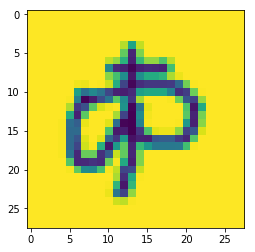

In [6]:
plt.imshow(a)

1622개의 데이터, 20개의 num_of_class, 28 * 28 의 grayscale Image

### Load image by PIL

* How to convert grayScale?

https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

In [14]:
#sample img load
str = './train/img_'
dir = str + '2' + '.jpg'

img = PIL.Image.open(dir) 
#img2 = PIL.Image.open(dir).convert('L') #grayscale로 불러옴

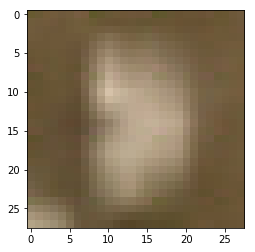

In [15]:
plt.imshow(img)

In [6]:
np.array(img).shape

(28, 28, 3)

In [9]:
#define function
def image_preprocessing(image):
    """image preprocessing
    transform image pixel value: int [0, 255] -> float [0, 1.0]

      Args:
        image: PIL image format
  
      Returns:
        image: float type numpy array with shape [1, image_h, image_w, 1] which is in [0, 1]
    """
    #image = np.asarray(image) / 255 # image in [0, 1]
    
    image = np.expand_dims(image, axis=0)
    return image

In [10]:
image_preprocessing(img).shape

(1, 28, 28, 3)

### Make Numpy array

1 28 28 3 -> 1 100 28 28 3 -> 7 100 28 28 3

In [11]:
#parameter
init_shape = image_preprocessing(img).shape
sam_list = np.expand_dims(np.zeros([100, 28, 28, 3]), axis=0)

In [12]:
print(init_shape)
print(sam_list.shape)

(1, 28, 28, 3)
(1, 100, 28, 28, 3)


In [16]:
data = np.array(np.zeros(init_shape))
sam_list = np.expand_dims(np.zeros([100, 28, 28, 3]), axis=0)

for a in range(7):
    print(a)
    for i in range((a*100), (a+1) * 100):
        str = './train/img_'
        dir = str + np.str(i) + '.jpg'

        img = PIL.Image.open(dir)
        img = image_preprocessing(img)
        if i ==(a*100):
            data = np.array(img)
            pass
        else:
            data2 = np.array(img)
            data = np.concatenate((data,data2), axis=0)    
    data = np.expand_dims(data, axis=0)
    print(data.shape)
    sam_list = np.concatenate((sam_list, data), axis=0)
    data = np.array(np.zeros(init_shape))

0
(1, 100, 28, 28, 3)
1
(1, 100, 28, 28, 3)
2
(1, 100, 28, 28, 3)
3
(1, 100, 28, 28, 3)
4
(1, 100, 28, 28, 3)
5
(1, 100, 28, 28, 3)
6
(1, 100, 28, 28, 3)


In [17]:
sam_list.shape

(8, 100, 28, 28, 3)

In [ ]:
data = np.expand_dims(data, axis=0)
print(data.shape)

In [ ]:
#delete init_data
data = np.delete(data, 0, axis=1)

In [ ]:
data.shape

### Save npy File

In [18]:
np.save('train_data_6.npy', sam_list)

In [ ]:
class OmniglotImbalancedDAGANDataset(DAGANImbalancedDataset):
    def __init__(self, batch_size, last_training_class_index, reverse_channels, num_of_gpus, gen_batches):
        super(OmniglotImbalancedDAGANDataset, self).__init__(batch_size, last_training_class_index, reverse_channels,
                                                             num_of_gpus, gen_batches)
    def load_dataset(self, last_training_class_index):
        x = np.load("datasets/omniglot_data.npy")
        x_temp = []
        for i in range(x.shape[0]):
            choose_samples = np.random.choice([i for i in range(1, 15)])
            x_temp.append(x[i, :choose_samples])
        self.x = np.array(x_temp)
        self.x = self.x / np.max(self.x)
        x_train, x_test, x_val = self.x[:1200], self.x[1200:1600], self.x[1600:]
        x_train = x_train[:last_training_class_index]

        return x_train, x_test, x_val

* 참고사이트
    http://woongheelee.com/entry/%EC%97%90%EB%9F%AC-%ED%95%B4%EA%B2%B0-ImportError-libcublasso90-cannot-open-shared-object-file-No-such-file-or-directory
    
    https://stackoverflow.com/questions/50560395/how-to-install-cuda-in-google-colab-gpus
    
    https://stackoverflow.com/questions/49684495/is-it-possible-to-set-environment-variables-in-google-colaboratory